# File Overview

This file analyses the binary classifiers that were generated by the [5_country_classifier.ipynb](./5_country_classifier.ipynb) notebook.

# Outputs / Assets
* proportion of nopes bar chart
* top classifier by TPR, PPV, and ACC

In [1]:
pickle_file = 'full_country_row_sample_rate_1_country_min_sample_cutoff_1000_cutoffs_5000-2500-1000-500-250-100_results.pkl'

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 2000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 255

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [3]:
with open('./pickles/%s' % pickle_file, 'rb') as f:
    results_df = pickle.load(f)
    

# Data Evaluation

* many of the models degraded into naive classifiers that did not return any positives
* there is an inverse relationship between the proportion of respondents from a country and the proportion of models that were naive
* there were still some models that produced non-useless - although not impressive - results when measure by TPR and PRR


In [4]:
from visualise_binary_classifier_results.generate_country_aggregates import generate_country_aggregates

country_aggregates = results_df \
    .reset_index() \
    .groupby('country') \
    .apply(generate_country_aggregates) \
    .sort_values(by='country_proportion', ascending=False)

country_aggregates

,model_count,country_proportion,naive_classifier_count,proportion_of_naive_classifier
country,,,,
United States,18.0,0.194,0.0,0.000
India,18.0,0.128,0.0,0.000
Germany,18.0,0.060,17.0,0.944
United Kingdom,18.0,0.059,14.0,0.778
Canada,18.0,0.034,15.0,0.833
France,18.0,0.030,15.0,0.833
Brazil,18.0,0.029,17.0,0.944
Netherlands,18.0,0.021,15.0,0.833
Poland,18.0,0.020,15.0,0.833


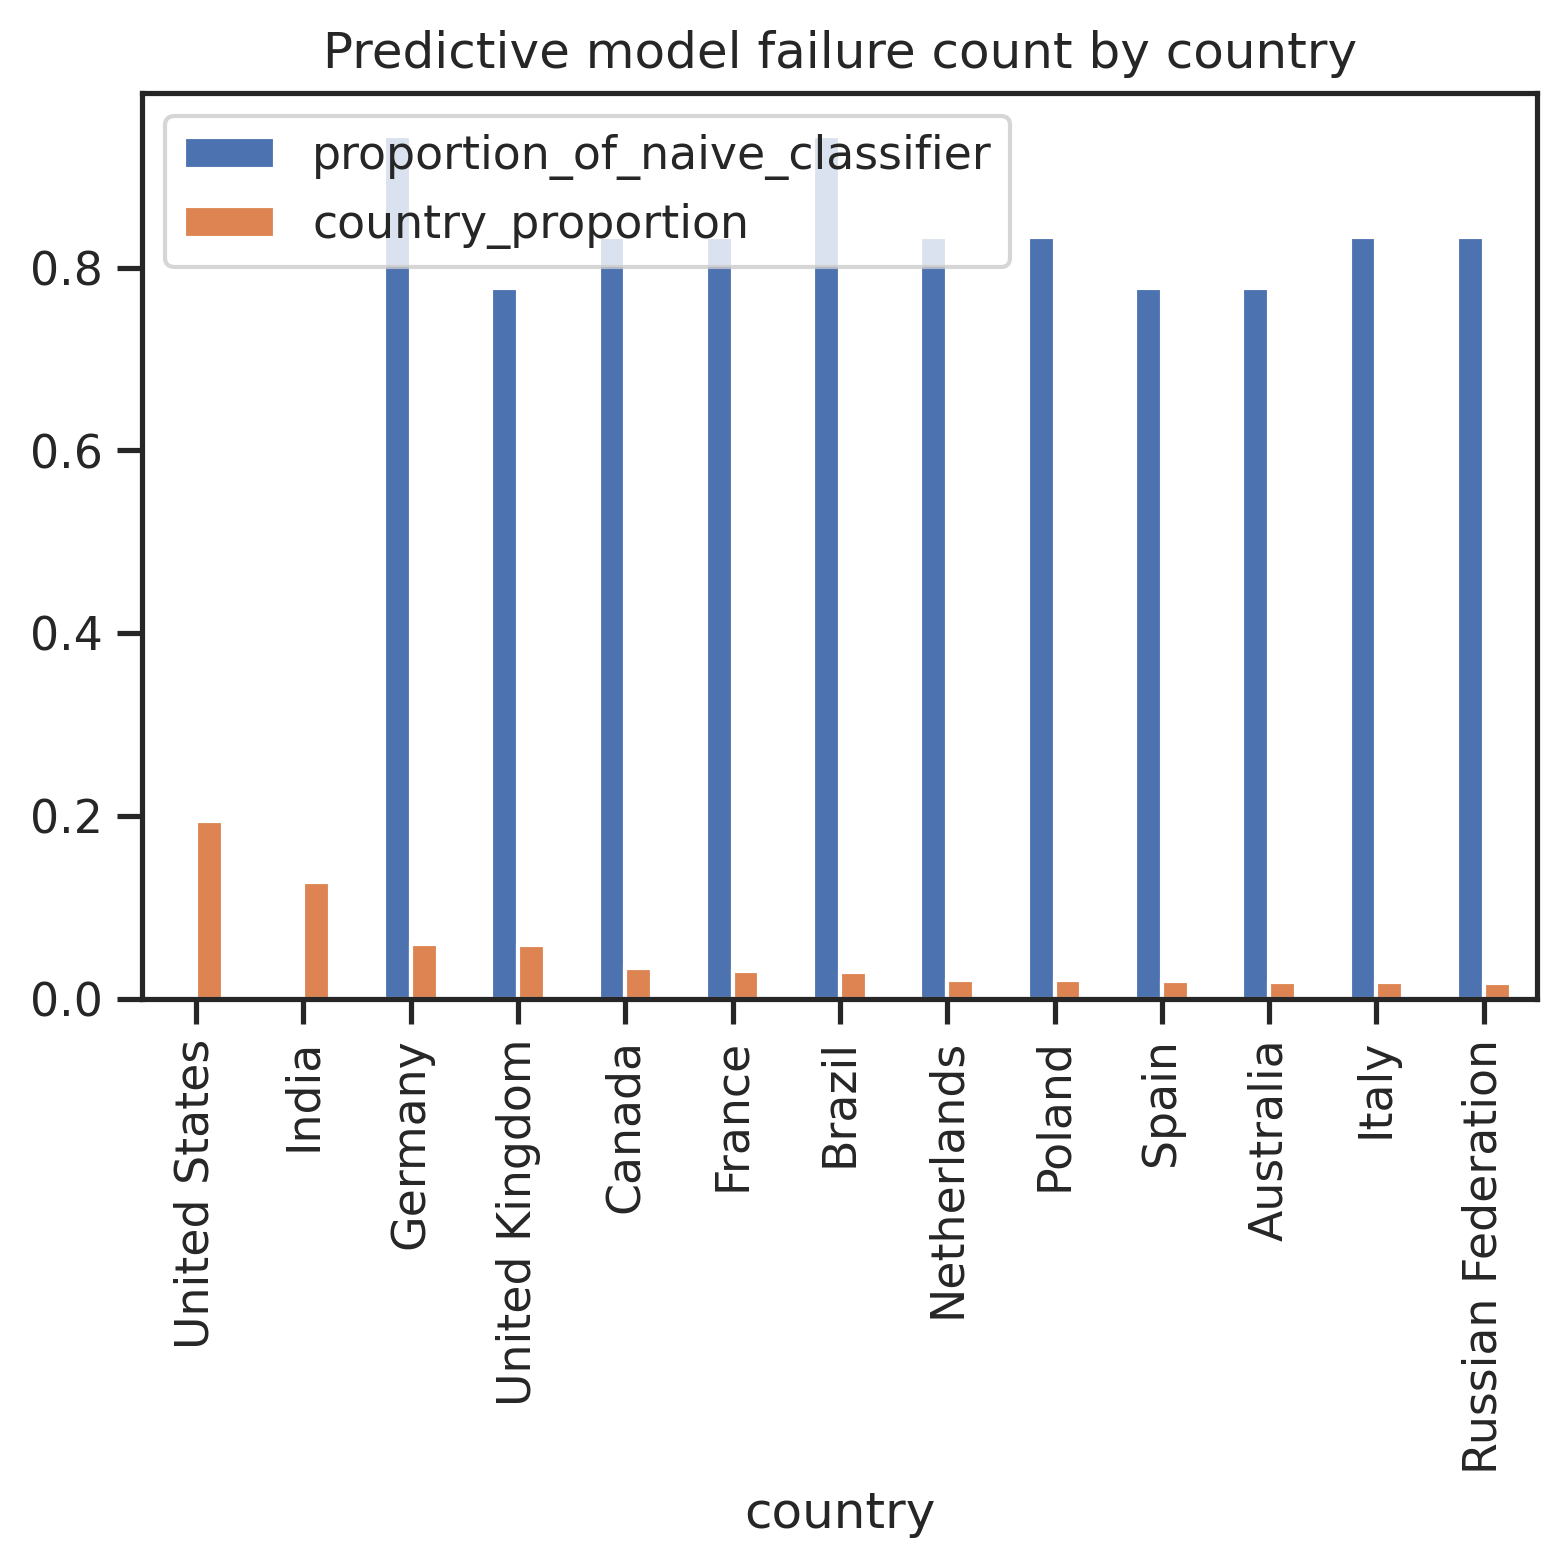

In [5]:
(country_aggregates[['proportion_of_naive_classifier', 'country_proportion']]).sort_values(by='country_proportion', ascending=False).plot(kind="bar");
plt.title("Predictive model failure count by country");

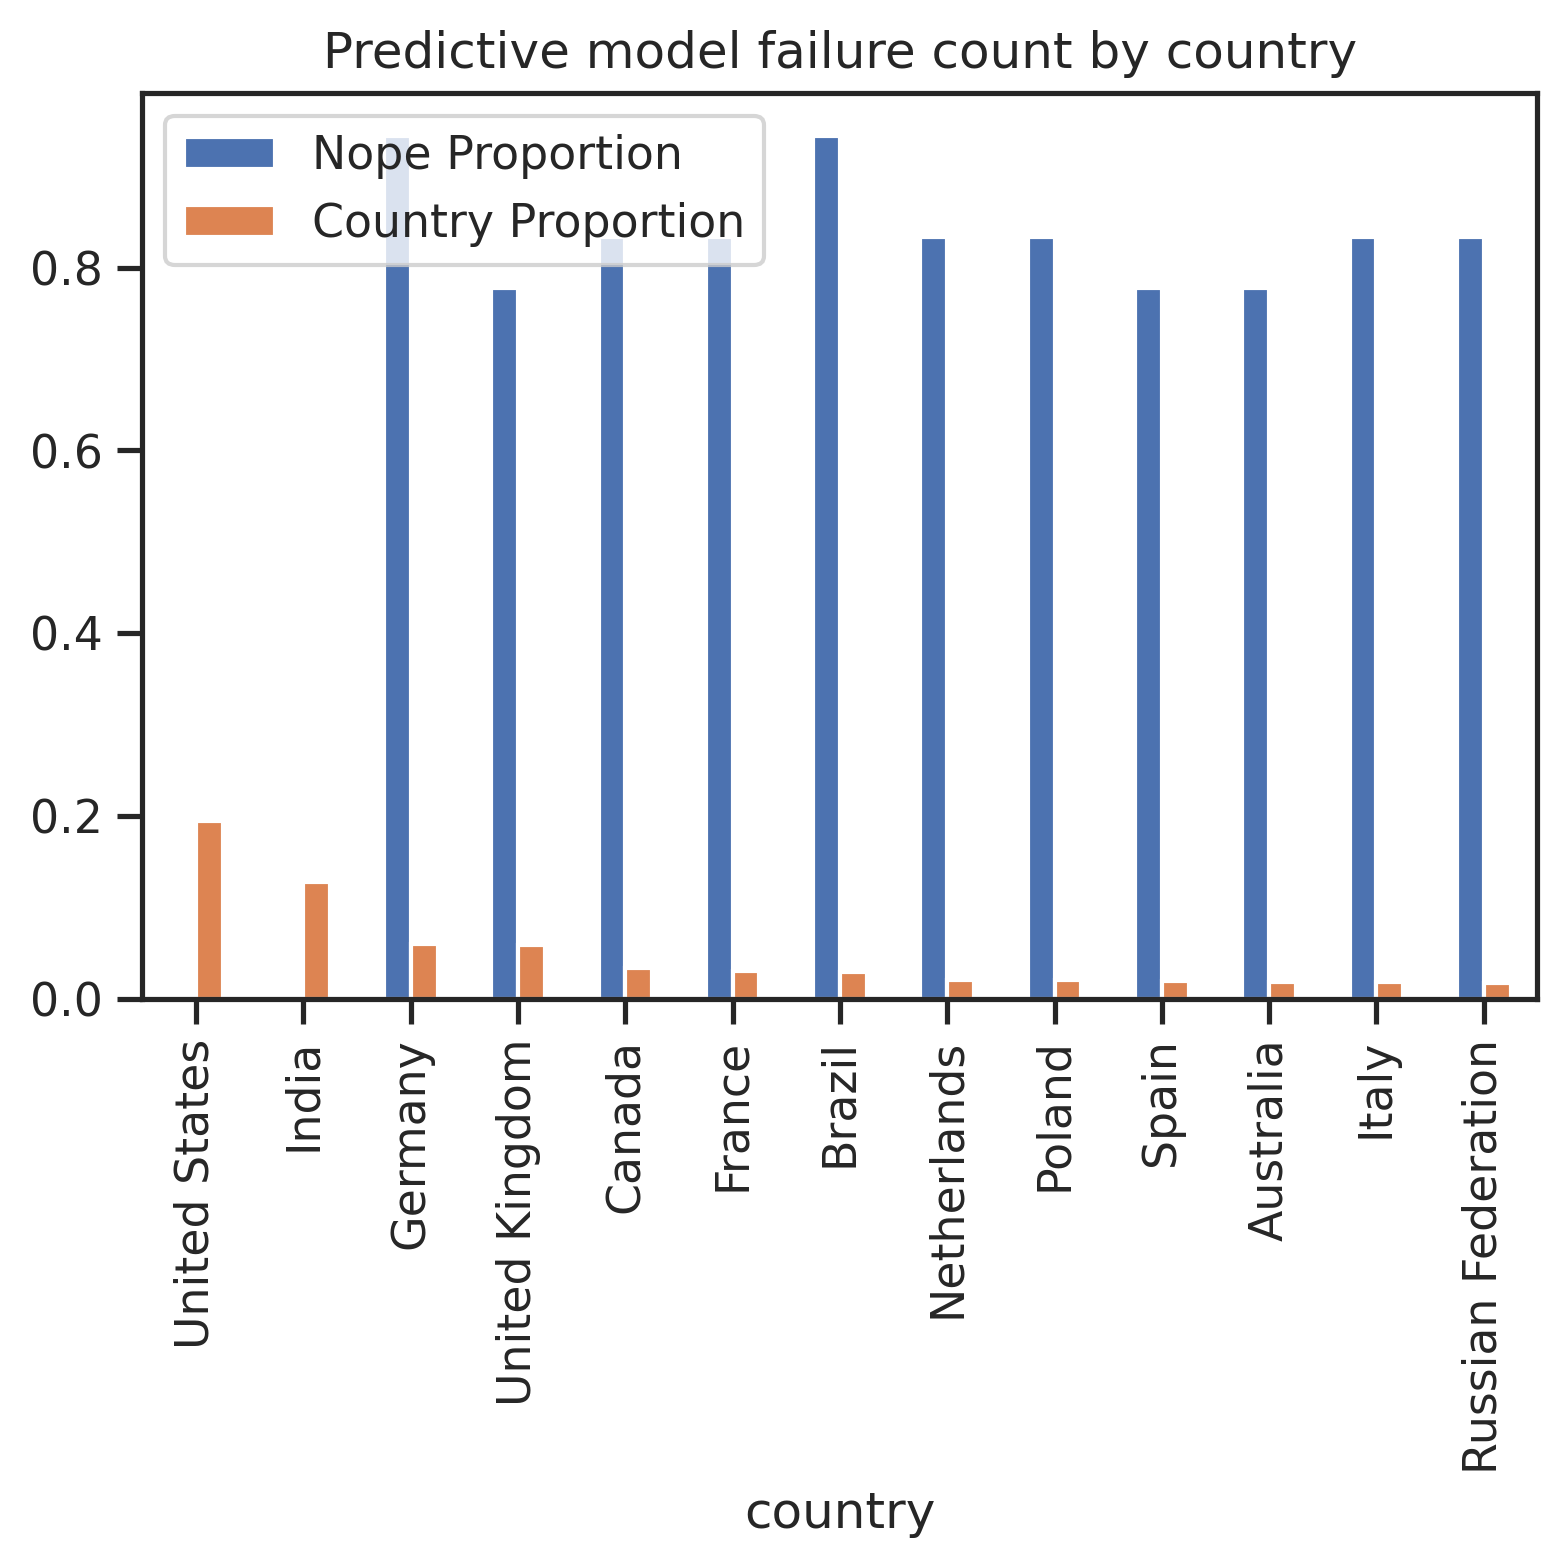

In [6]:
# for the blog change naive to nope
nope_data = country_aggregates[['proportion_of_naive_classifier', 'country_proportion']] \
    .rename(columns={ \
        'proportion_of_naive_classifier' : 'Nope Proportion', \
        'country_proportion' : 'Country Proportion' \
    })

(nope_data[['Nope Proportion', 'Country Proportion']]).sort_values(by='Country Proportion', ascending=False).plot(kind="bar");
plt.title("Predictive model failure count by country");

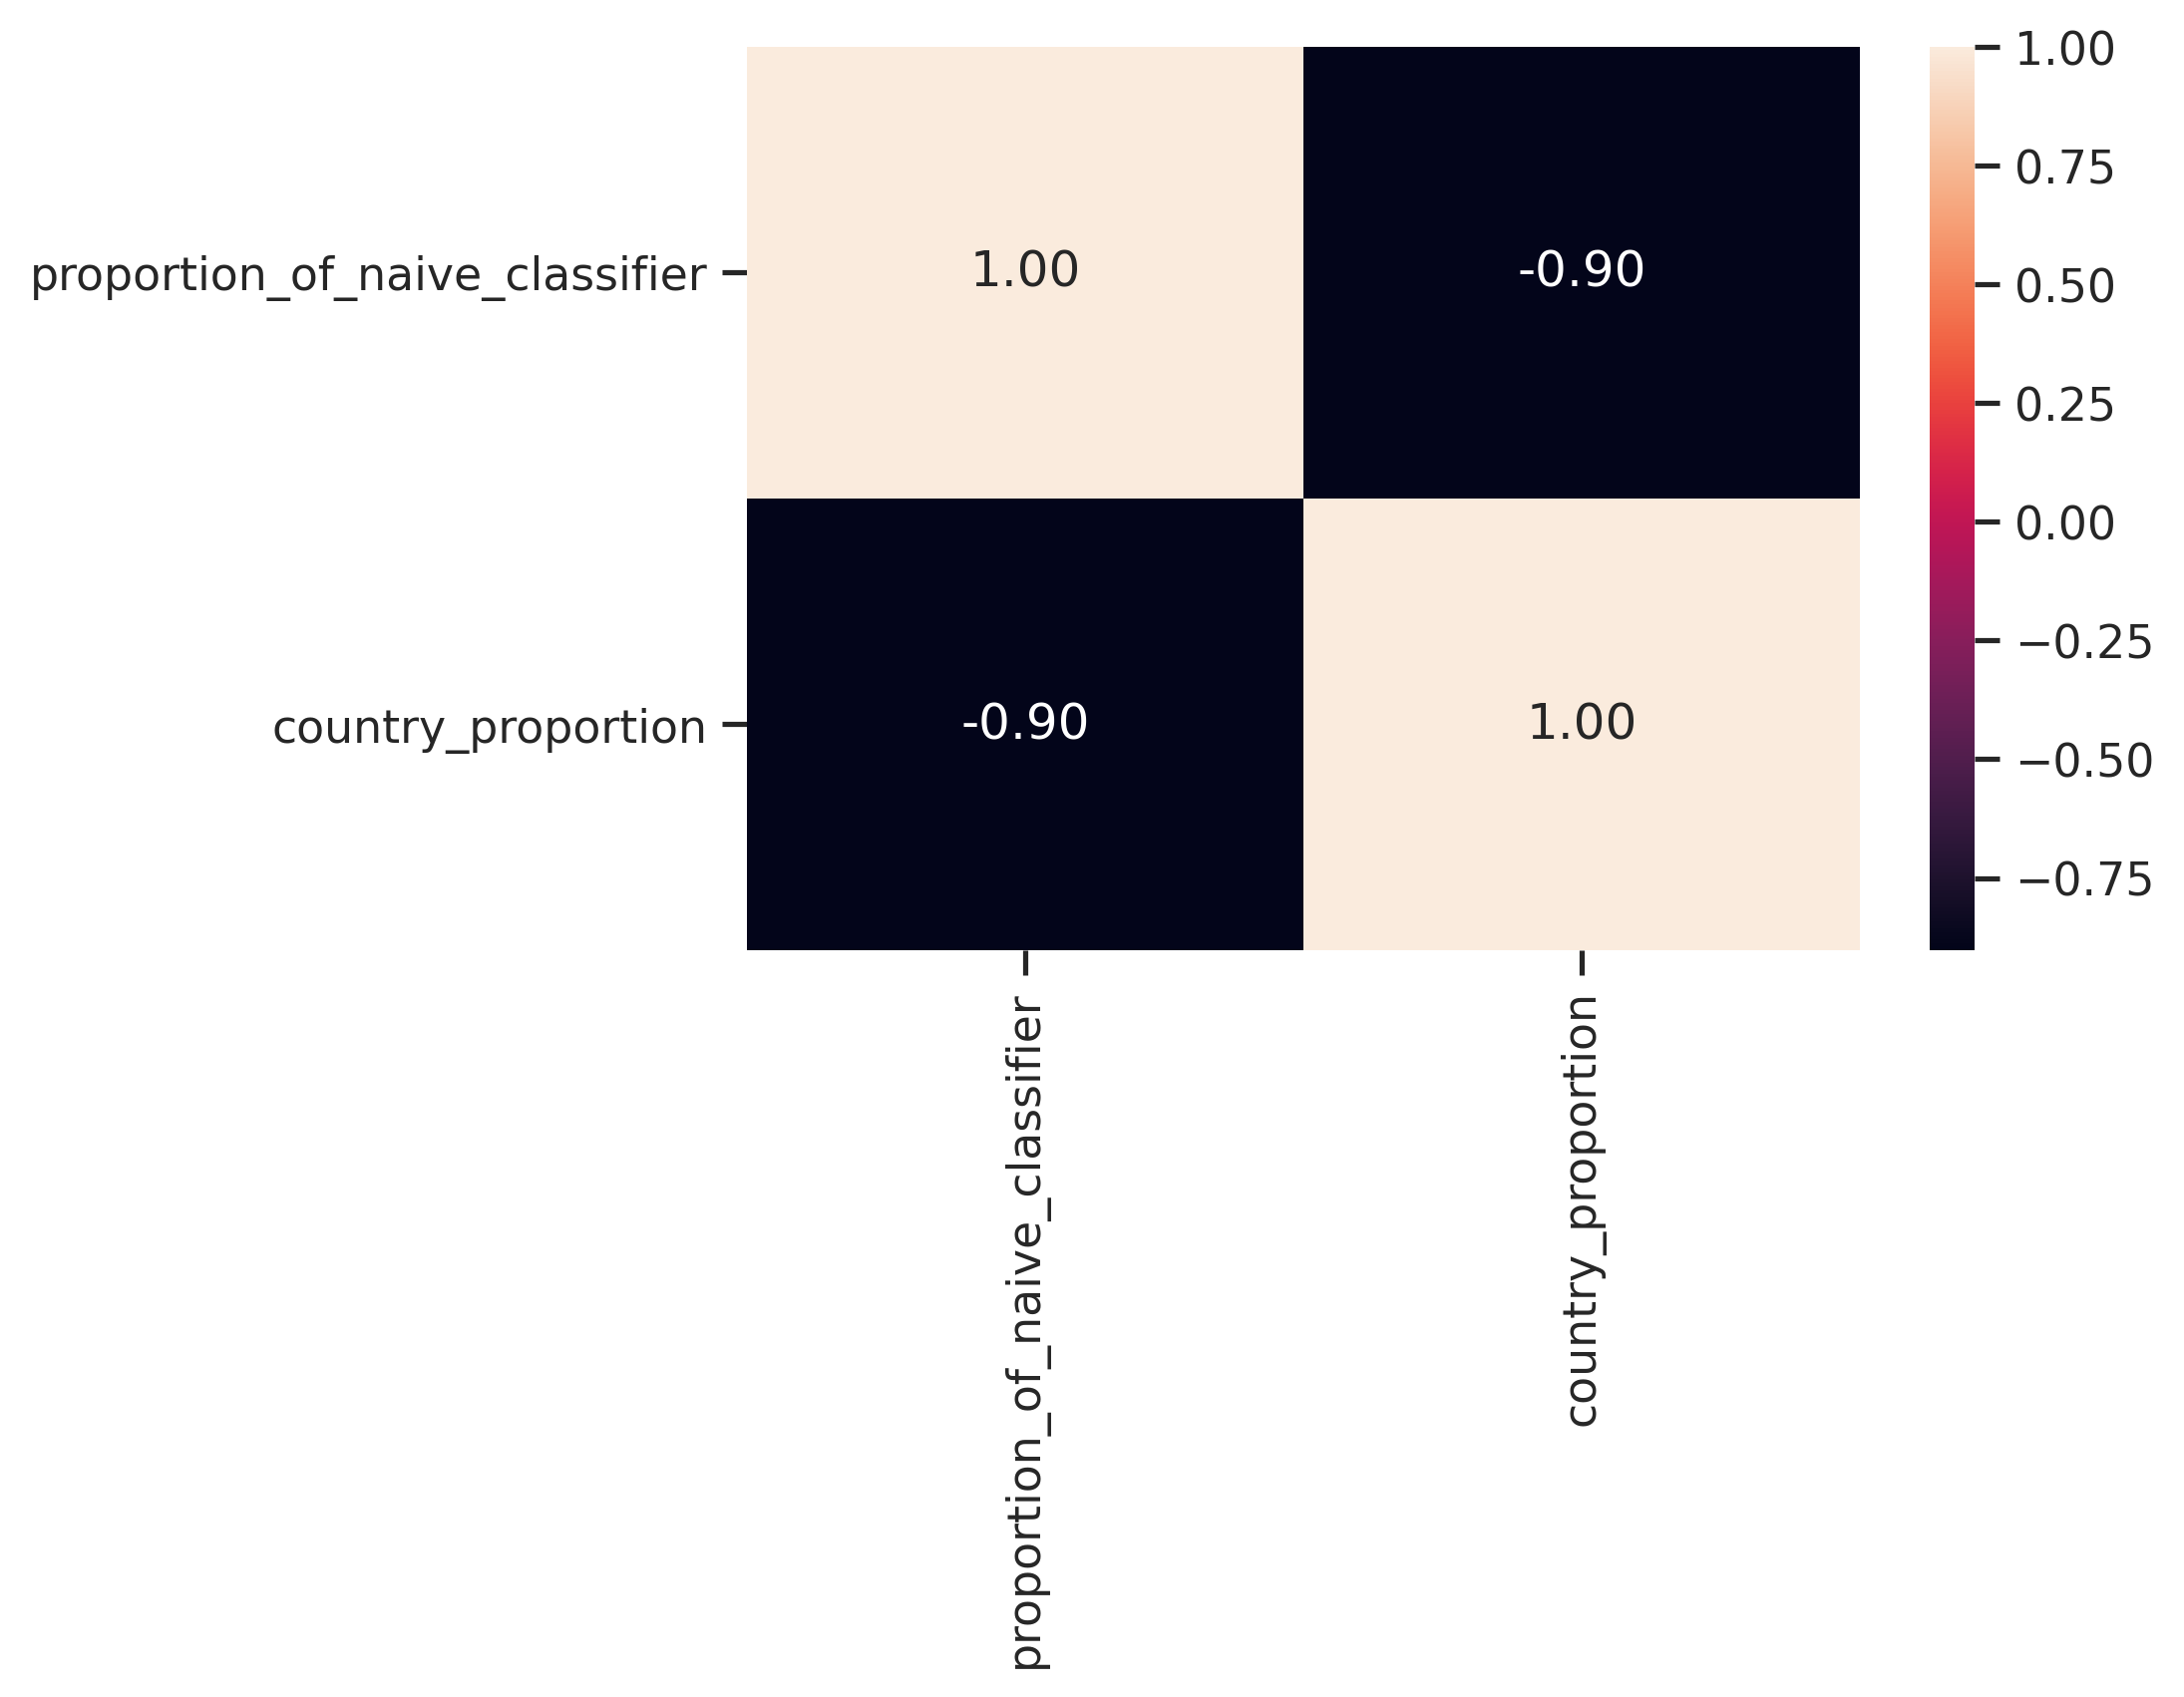

In [7]:
sns.heatmap(country_aggregates[['proportion_of_naive_classifier', 'country_proportion']].corr(), annot=True, fmt=".2f");

**Most Models are naive due to countryies being moderate minority classes in the data**
* most of the models were "naive" in that they always chose NO (not from country X)
    * this is a common issue when the [imbalanced data sets](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data). This is however beyond the scope of this introductory work

* We can see a clear inverse correlation between `proportion_of_naive_classifier` and `country_proportion`.
    * However the plot above shows it is not a linear correlation but more of a step function. India and the USA have no naive, but the rest have high naive proportion with a fair bit of variance in the actual proportion. 

**Model Performance**
* The top classifier measured by `True Positive Rate` (TPR) was an SVM classifier for Canada. It had a TPR of 98.9% but at the cost of a low accuracy (11.3%) and a terrible `Positive Predictive Rate` (PPV) of 3.2%.
* The top classifier measured by `Positive Predictive Rate` (PPV) was a random forest classifier for India. It had a PPV of 95% and an accuracy of 87% but an abysmal 0.8% true positive rate.
* The top classifier measure by `Accuracy` was a classifier that had sub 1% TPR and PPV, showing that for this dataset Accuracy is a bad measure of model performance

In [8]:
non_useless_classifiers = results_df \
    .query('TP > 0') \
    .drop(columns=['X_columns', 'coefficients'])

In [9]:
print("model count %s" % results_df.shape[0])
print("non useless classifiers (i.e., P > 0): %s" % non_useless_classifiers.shape[0])

model count 234
non useless classifiers (i.e., P > 0): 58


In [10]:
non_useless_classifiers.sort_values(by='TPR', ascending=False) \
    .rename(columns = {}) \
    [['model_type', 'column_count', 'P', 'N', 'TPR', 'TNR', 'PPV', 'NPV', 'ACC']] \
    .head(1)

,,model_type,column_count,P,N,TPR,TNR,PPV,NPV,ACC
country,cutoff,,,,,,,,,
Canada,250,linear_svm,439,658,18681,0.989,0.082,0.037,0.995,0.113


In [11]:
non_useless_classifiers.sort_values(by='PPV', ascending=False).head(10) \
    .rename(columns = {}) \
    [['model_type', 'column_count', 'P', 'N', 'TPR', 'TNR', 'PPV', 'NPV', 'ACC']] \
    .head(1)

,,model_type,column_count,P,N,TPR,TNR,PPV,NPV,ACC
country,cutoff,,,,,,,,,
India,500,random_forest,433,2472,16867,0.008,1.0,0.95,0.873,0.873


In [12]:
non_useless_classifiers.sort_values(by='ACC', ascending=False).head(10) \
    .rename(columns = {}) \
    [['model_type', 'column_count', 'P', 'N', 'TPR', 'TNR', 'PPV', 'NPV', 'ACC']] \
    .head(1)

,,model_type,column_count,P,N,TPR,TNR,PPV,NPV,ACC
country,cutoff,,,,,,,,,
Italy,250,linear_svm,439,345,18994,0.003,0.99,0.005,0.982,0.973


# Next Steps / Better Metrics

* I would like to evaluate these models use [ROC curve and AUC curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) but that is beyond my capabilities and the scope of this assignment. I am also not sure how to get a confidence score from SVM and Random Forest models, which I think is necessary to evaluate ROC and AUC.